<a href="https://colab.research.google.com/github/IbtisamKH93/co2emissions/blob/main/Ibtisam%20MATH%202315%20Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [2]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

In this lab, we observe and analyze the co2 emission levels in the current top 10 countries from 1971 to 2020. The data set was obtained from Our World in Data https://github.com/owid/co2-data on 03/29/2023.

## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/IbtisamKH93/co2emissions.git as a `DataFrame`. Name the `DataFrame` `df`.

##### Solution

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/IbtisamKH93/co2emissions/main/owid-co2-data.csv')

Pandas function is used to load the data from owid repository

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [4]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

In non_countries, data are mixed with countries and other related information

Remove the rows corresponding to the non-countries.

In [5]:
df = df.loc[df['country'].isin(non_countries) == False]

The loc property only uses the type of data we want to analyze which is countries.

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

In [6]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


df.head () shows the data with headings in a table and a clearer pattern.

##### Solution

##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

1) Yes. The population column contains incrorrect data where the values contains decimals.
2) Yes.

##### Solution

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

In [8]:
df.isna().sum()

country                         0
year                            0
iso_code                      387
population                   3585
gdp                         25103
                            ...  
share_global_other_co2      38018
total_ghg                   33819
total_ghg_excluding_lucf    33819
trade_co2                   35908
trade_co2_share             35909
Length: 74, dtype: int64

##### $\rightarrow$ What years are present in the data set?

1850 to 1854 and 2017 to 2021

In [9]:
df.loc[:,["year"]]

,year
0,1850
1,1851
2,1852
3,1853
4,1854
...,...
46518,2017
46519,2018
46520,2019
46521,2020


The function Loc is used here to display the information we need which is year.

##### Solution

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



##### Solution

In [10]:
df.sort_values(by='co2',ascending=False).loc[df['year'] == 2020][['country','co2']].head(10)

,country,co2
8989,China,10956.213
44221,United States,4715.691
20136,India,2445.012
35053,Russia,1624.221
21756,Japan,1042.224
20552,Iran,729.978
36664,Saudi Arabia,661.193
16794,Germany,639.381
20308,Indonesia,609.786
39259,South Korea,597.634


the CO2 data was sorted in descending pattern using sort_values and loc is used to show the CO2 levels in 2020.

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

##### Solution

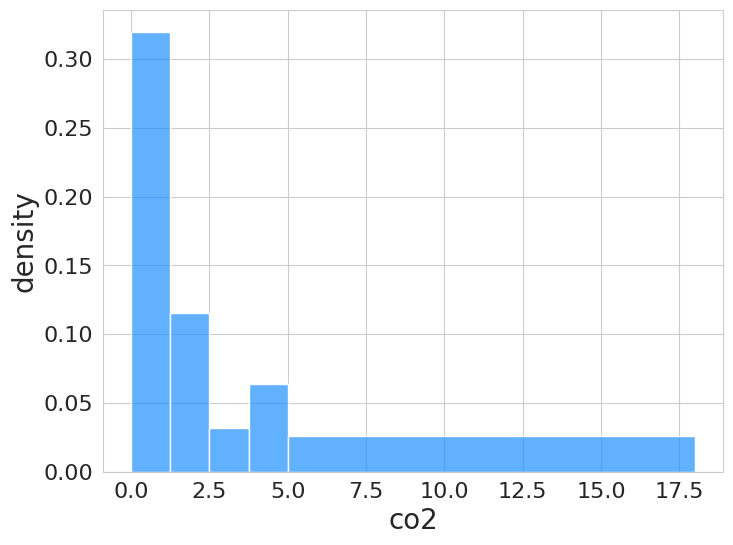

In [11]:
# set the figure size

plt.figure(figsize = (8,6))

# Produce the histogram 

sns.histplot(data = df[df['year'] == 2020], x= 'co2',bins = np.r_[np.linspace(0,5,5),18], color ='dodgerblue', alpha = 0.7, stat = 'density')

# Label the axes

plt.ylabel('density',fontsize = 20)
plt.xlabel('co2',fontsize = 20)

# Set sizes for tick labels

plt.tick_params(labelsize = 16);

The histogram is produced using seaborn library using sns.histplot. The steps in the code above; figure size, font size, bin colors, and xy labels are set.

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

##### Solution

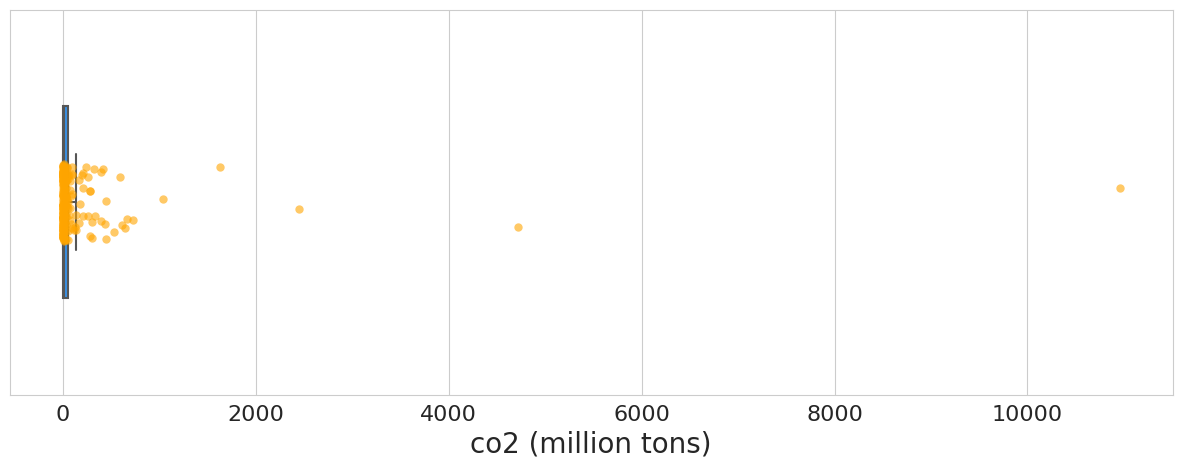

In [12]:

plt.figure(figsize = (15,5))
# Use seaborn to the boxplot without outliers (fliers = 0)
sns.boxplot(data = df[df['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, fliersize = 0)
# Use seaborn to make the swarm plot
sns.stripplot(data = df[df['year'] == 2020],x = 'co2', color = 'orange', size = 6, alpha = 0.6)
# Label the axe
plt.xlabel('co2 (million tons)', fontsize = 20)
# Set sizes for tick labels 
plt.tick_params(labelsize = 16);

Boxplot and swarm plot are produced by seaborn library using sns.boxplot and sns.stripplot respectilvely. The figure and font sizes, bin colors, and x label are set. The x- axis is set to display CO2 emissions (million tons).


##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

Yes because top 10 countries emmit the highest levels of CO2 among all other countries in the world, and all countries in the world can't have very similar values of CO2.

##### Solution

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

No. The data set includes all top 10 emmiters in 2020 over the period of 1971 to 2020

##### Solution

In [13]:
top10 = df.sort_values(by='co2', ascending = False).loc[df['year'] == 2020]['country'].head(10)
emmiters = top10.tolist()
df_years = df.loc[(df['year'] < 2020) & (df['year'] > 1971)]
df_years_countries = df_years.loc[df_years['country'].isin(emmiters) == True]
df_years_countries['co2'].isna().sum()
                                                                                        

0

Sort_values orgaized the data in a descending order and loc restricted the information to top 10 countries that produced CO2 and the to the year of 2020.
in the third line, the loc function restriced the CO2 data to only < 1971 - 2020 > in top 10 countries.

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

##### Solution

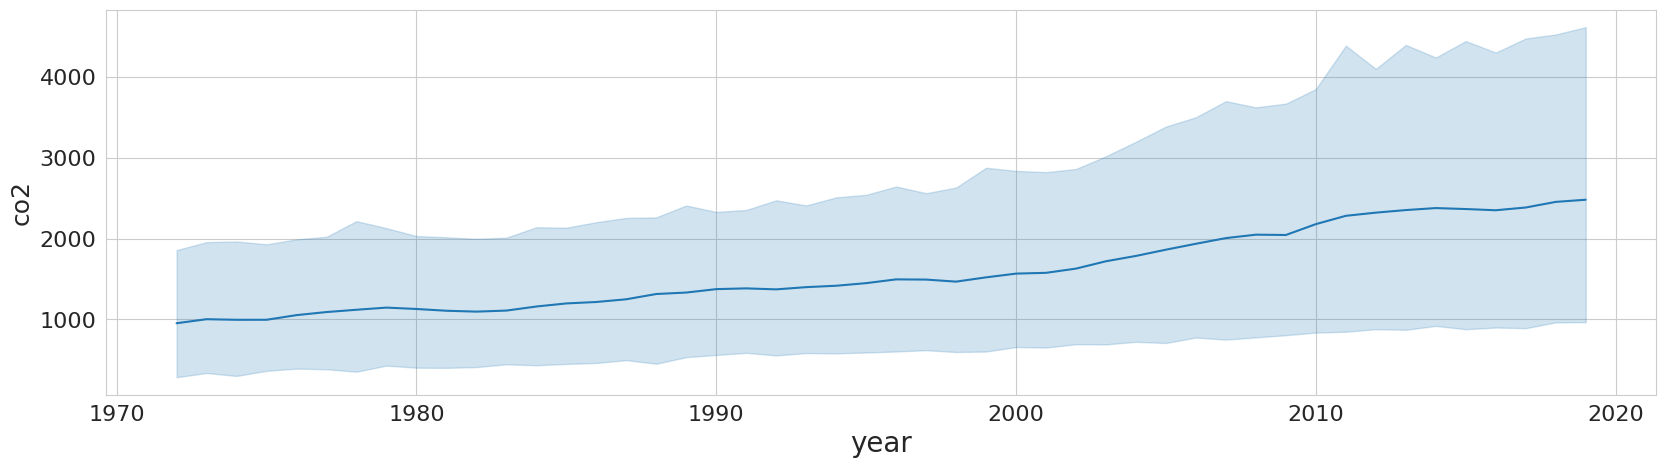

In [14]:
# figure size
plt.figure(figsize=(20,5))
sns.lineplot(data=df_years_countries, x = 'year', y= 'co2')

# Label the axes
plt.xlabel('year', fontsize = 20)
plt.ylabel('co2', fontsize =18)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

The line plot is produced using the steps in the code above; figure size, font size, bin colors, and xy labels are set. Seaborn liberary is used to generate the line plot using sns.lineplot. The x- axis is set to display the years (1971 - 2020) using plt.x label. The y- axis is set to display CO2 levels using plt.y label.

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

##### Solution

<ipython-input-15-8a6d6e847798>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df_years.groupby('country').mean(), x = 'year', y = 'co2', color = 'k')


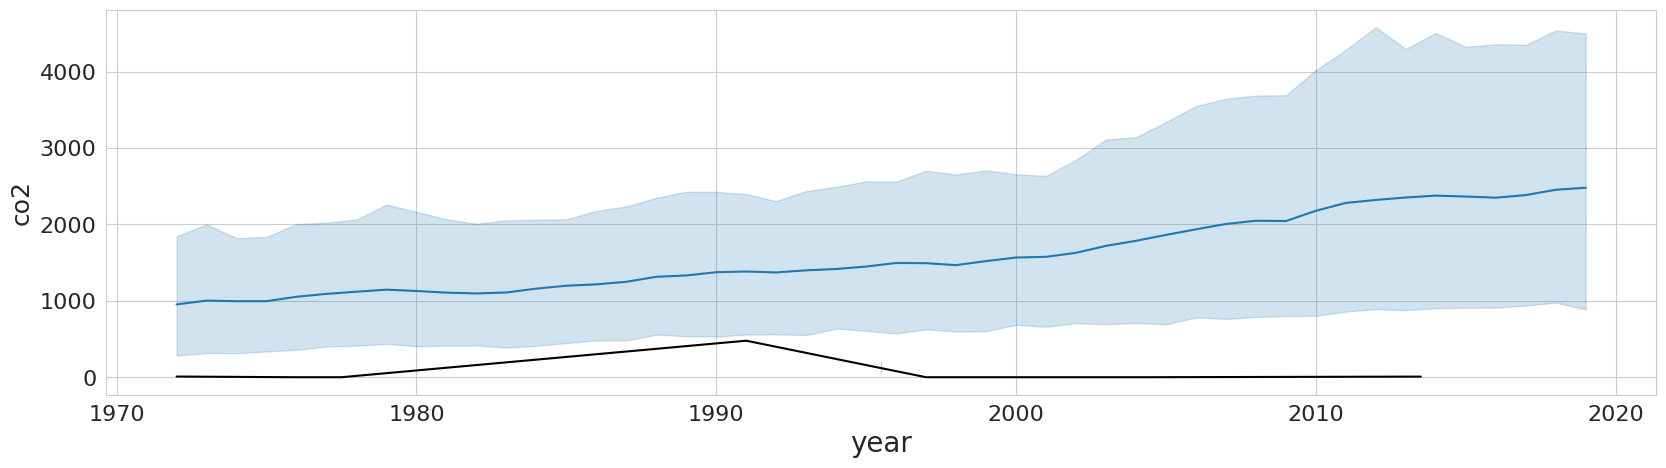

In [15]:

plt.figure(figsize = (20,5))
sns.lineplot(data = df_years_countries, x = 'year', y='co2')
sns.lineplot(data = df_years.groupby('country').mean(), x = 'year', y = 'co2', color = 'k')
plt.tick_params(labelsize = 12)

plt.xlabel('year', fontsize = 20)
plt.ylabel('co2', fontsize = 18)

plt.tick_params(labelsize = 16);

The line plot is produced using the steps in the code above; figure size, font size, bin colors, and xy labels are set. Seaborn liberary is used to generate the line plot that shows the mean using sns.lineplot(data = .... mean()). The x- axis is set to display the years (1971 - 2020) using plt.x label. The y- axis is set to display CO2 levels using plt.y label.

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

##### Solution

<ipython-input-16-62e6cd7ee70f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data= df_years.groupby('country').mean(), x = 'year', y = 'co2', color = 'k')


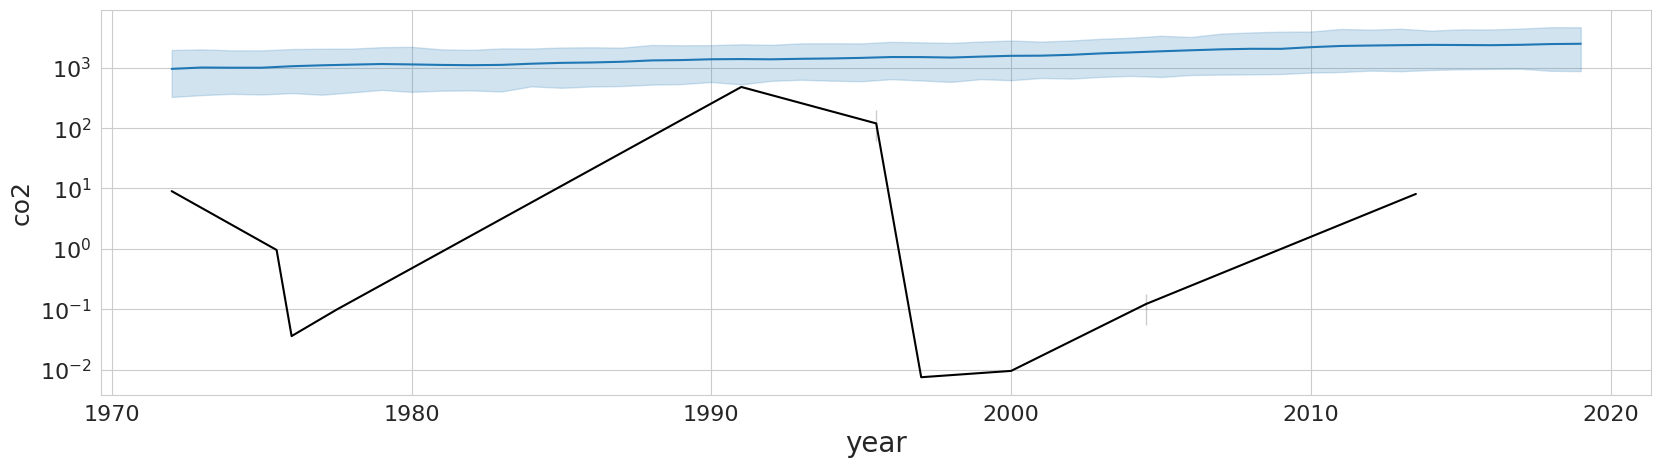

In [16]:

plt.figure(figsize=(20,5))
sns.lineplot(data = df_years_countries, x = 'year', y = 'co2')
sns.lineplot(data= df_years.groupby('country').mean(), x = 'year', y = 'co2', color = 'k')
plt.tick_params(labelsize = 12)

plt.xlabel ('year', fontsize = 20)
plt.ylabel ('co2', fontsize = 18)
plt.yscale ("log")

plt.tick_params(labelsize = 16);

The log scale is produced using the steps in the code above; figure size, font size, bin colors, and xy labels are set. 
The x- axis is set to display the years (1971 - 2020) using plt.x label.
The y- axis is set to display CO2 levels using plt.y label.
The log scale is set in the y axis using plt.y scale ('log'). 

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

##### Solution

The CO2 emission levels fluctuated over the last 50 years. CO2 decreased gradually between roughly 1971 to 1976 and declined dramatically for one year. CO2 in the atmosphere increased linearly for approximately 15 years later, and then it started to decrease slightly from 1991 to 1996, and again, it dropped sharply in 1997. From the beginning of 21 century until today, there is a gradual increase in CO2.   